<a href="https://colab.research.google.com/github/monikabuss/ISYS5002-2024-semester2/blob/main/Code_Development_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Are there any missing values in the assignment? Check for missing values, see lab 10

##Assignemnt 2
The process of problemsolving can be broken down into six steps:
1.	State the problem clearly (In Business Report)
2.	Describe the input and output (In Business Report)
3.	Work a simple example by hand
4.	Develop an algorithm/pseudocode
5.	Convert to Python
6.	Test solution with a variety of data


##3. Work a simple example by hand
To solve the problem, one would have to look into different factors such as democraphic factor (gender, age), clinical factors (cholesterol, glucose levels, blood pressure) and lifestyle factors (smoking, alcohol consumption, physical activity). Based on these different factors, one must look into different combinations of these factors, and that could look like this:

1. If you smoke (lifestyle) and you are in your twenties (demographic), then your patters would be different, than if your life looked like this:

2. If you are in your sixties (demographic) and you have high blood pressure (clinical), then your cardiovascular health is different from a eprson with the following combination:

3. If you are a boy (demographic), you smoke (lifestyle) and you have low bloodpressure), then your cardiovascular health will look different from:

4. If you are a girl in your mid-thirtees (demographics), you don´t drink alcohol (lifestyle) and you have low colesterol (clinical).

##4. Develop an algorithm/pseudocode

#Input:

Get the age, the gender, the height, the weight, bloodpressure, cholesterol level, glucose level, smoke status, alcohol consumption status, activity status and cardiovascular desease presence.

-

#Process:

Get the age of the individual (in days)

Get the gender of the individual (1: female, 2: male)

Get the height of the individual (in cm)

Get the weight of th individual (in kg)

Does the individual have Systolic blood pressure (ap_hi) or Diastolic bloodpressure (ap_lo)?

Get the colesterol level (1: normal, 2: above normal, 3: well above normal)

Get the glucose level (1: normal, 2: above normal, 3: well above normal)

Get smoke status (0: non-smoker, 1: smoker)

Get alcohol consumption status (0: non-drinker, 1: drinker)

Get physical activity status (0: inactive, 1: active)

Get cardiovascular disease presence (0: no disease, 1: disease)

-

#Output:

Analyse different combinations of factors influence cardiovascular disease outcomes.

Select and analyse combinations from three groups: Demographic (age, gender), Clinical (cholesterol, glucose and blood pressure) and lifestyle (smoking, activity status and alcohol consumption).





##5. Convert to Python

In [11]:
#Import the necesaary libraries
#Import Python standard library?
import sqlite3 as sql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import csv

The database "cardiohealth.db" is given.

In [12]:
#create a connection object to the uploaded database cardiohealth.db
conn = sql.connect('cardiohealth.db')

#create a cursor object to execute SQL queries against a database
cur = conn.cursor()

First, we need to inspect the database and see what tables are given:

In [13]:
#inspect what is given, looking for tables
sql='''
SELECT name FROM sqlite_master WHERE type='table';
'''
cur.execute(sql)
cur.fetchall()

[('medical_examination',)]

The database "cardiohealth.db" contains one table which is called "medical_examination".
Now we have to inspect the table to see what details are given.

In [14]:
#inspecting the details of the table 'medical_examination'
sql='''
PRAGMA table_info('medical_examination');
'''
cur.execute(sql)
cur.fetchall()

[(0, 'id', 'INTEGER', 0, None, 0),
 (1, 'age', 'INTEGER', 0, None, 0),
 (2, 'gender', 'INTEGER', 0, None, 0),
 (3, 'height', 'INTEGER', 0, None, 0),
 (4, 'weight', 'REAL', 0, None, 0),
 (5, 'ap_hi', 'INTEGER', 0, None, 0),
 (6, 'ap_lo', 'INTEGER', 0, None, 0),
 (7, 'cholesterol', 'INTEGER', 0, None, 0),
 (8, 'gluc', 'INTEGER', 0, None, 0),
 (9, 'smoke', 'INTEGER', 0, None, 0),
 (10, 'alco', 'INTEGER', 0, None, 0),
 (11, 'active', 'INTEGER', 0, None, 0),
 (12, 'cardio', 'INTEGER', 0, None, 0)]

The table "medical_examination" contains 13 attributes. Since the assignment taks does not contain height and weight in the factor groups, we do not include them in the med_ex_df dataframe in the following.


In [15]:
#put 'medical_exmaination' into dataframe, only what is relevant for later (not height and weight since we dont need the BMI)
sql='''
SELECT id, age, gender, ap_hi, ap_lo, cholesterol, gluc, smoke, alco, active, cardio from medical_examination;
'''
# Load the data into a DataFrame
med_ex_df = pd.read_sql_query(sql, conn)

Now we want to see how the dataframe looks like, we look at the first 10 rows.

In [16]:
#show the first 10 rows of the dataframe
med_ex_df.head(10)

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,110,80,1,1,0,0,1,0
1,1,20228,1,140,90,3,1,0,0,1,1
2,2,18857,1,130,70,3,1,0,0,0,1
3,3,17623,2,150,100,1,1,0,0,1,1
4,4,17474,1,100,60,1,1,0,0,0,0
5,8,21914,1,120,80,2,2,0,0,0,0
6,9,22113,1,130,80,3,1,0,0,1,0
7,12,22584,2,130,90,3,3,0,0,1,1
8,13,17668,1,110,70,1,1,0,0,1,0
9,14,19834,1,110,60,1,1,0,0,0,0


Since the dataframe is very long, we would like to see some information about it as missing data etc.

In [7]:
#show the info of the dataframe
med_ex_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   age          70000 non-null  int64
 1   gender       70000 non-null  int64
 2   ap_hi        70000 non-null  int64
 3   ap_lo        70000 non-null  int64
 4   cholesterol  70000 non-null  int64
 5   gluc         70000 non-null  int64
 6   smoke        70000 non-null  int64
 7   alco         70000 non-null  int64
 8   active       70000 non-null  int64
 9   cardio       70000 non-null  int64
dtypes: int64(10)
memory usage: 5.3 MB


The table 'medical_examination' seems to have no missing value since there is 7000 columns in every row.

We need to inspect the data values, therefore we use the describe-function to examine the statistics of the table.

In [8]:
#describing the table
med_ex_df.describe()

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349843,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.477253,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,3.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


## First type f discussion

From the statistic table above following observations can be made:
The age values seem to be correct, reaching from 10798 days (approx. 29,6 years) to 23713 days (approx. 65 years)


The gender should be either female (1) or male (2) given by the assignment task description. However, the table shows also number 3 which is not defined, so an invalid number that needs to be discharged.


The blood pressure values should have values between
ap_hi max 370

highest/lowest values --> reference, what are we doing?
then we clean the dataset

Pre-Processing

In [ ]:
#check for duplicates but here not all seen, what columns am i looking for
med_ex_df.duplicated()
#do the values make sense tht we have, high numbrs or negative numbers

,0
0,False
1,False
2,False
3,False
4,False
...,...
69995,False
69996,False
69997,False
69998,False


In [ ]:
#display duplicates, when we dont use the id then there is a lot of duplicates, which makes sense, also when we group the ages then it is probably also more duplicates??
duplicates = med_ex_df[med_ex_df.duplicated()]
duplicates



,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
818,18235,1,110,70,1,1,0,0,1,0
1037,16709,1,120,80,1,1,0,0,1,0
1529,22124,1,120,80,1,1,0,0,1,0
1686,14598,2,120,80,1,1,0,0,1,0
1795,19593,1,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
69948,20388,1,130,80,1,1,0,0,1,1
69974,18226,1,120,80,1,1,0,0,1,0
69975,21264,2,120,80,1,1,0,0,1,1
69983,19652,1,120,80,1,1,0,0,1,0


In [ ]:
# Removing Duplicates (if any)

med_ex_df_1 = med_ex_df.drop_duplicates()
med_ex_df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64715 entries, 0 to 69999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   age          64715 non-null  int64
 1   gender       64715 non-null  int64
 2   ap_hi        64715 non-null  int64
 3   ap_lo        64715 non-null  int64
 4   cholesterol  64715 non-null  int64
 5   gluc         64715 non-null  int64
 6   smoke        64715 non-null  int64
 7   alco         64715 non-null  int64
 8   active       64715 non-null  int64
 9   cardio       64715 non-null  int64
dtypes: int64(10)
memory usage: 5.4 MB


In [ ]:
med_ex_df_1.tail(20)

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69978,18800,1,90,60,1,1,0,0,1,1
69979,22423,1,160,100,2,2,0,0,1,1
69980,17727,2,110,80,1,1,0,1,0,0
69981,17500,2,130,90,2,2,0,0,1,1
69982,18941,1,130,90,1,2,0,0,1,1
69984,17926,2,120,80,1,1,0,0,1,1
69985,18194,1,130,80,1,1,0,1,0,1
69986,18198,2,120,80,1,1,0,0,1,0
69988,21978,1,110,70,1,1,0,0,1,0
69989,21013,1,120,70,1,1,0,0,1,1


In [ ]:
#check for missing values
med_ex_df_1.isnull()

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
69995,False,False,False,False,False,False,False,False,False,False
69996,False,False,False,False,False,False,False,False,False,False
69997,False,False,False,False,False,False,False,False,False,False
69998,False,False,False,False,False,False,False,False,False,False


In [ ]:
#pre-processing
#convert age to years in the same column
med_ex_df_1['age'] = med_ex_df_1['age'] / 365
med_ex_df_1.head(10)
# Create age groups
med_ex_df_1['age_group'] = pd.cut(med_ex_df_1['age'], bins=[0, 30, 40, 50, 60, 70, 80, 100], labels=['<30', '30-39', '40-49', '50-59', '60-69', '70+'])
med_ex_df_1.head(10)

<ipython-input-129-2033b8a111df>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  med_ex_df_1['age'] = med_ex_df_1['age'] / 365
<ipython-input-129-2033b8a111df>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  med_ex_df_1['age_group'] = pd.cut(med_ex_df_1['age'], bins=[0, 30, 40, 50, 60, 70, 80, 100], labels=['<30', '30-39', '40-49', '50-59', '60-69', '70-79', '80+'])


,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_group
0,50.391781,2,110,80,1,1,0,0,1,0,50-59
1,55.419178,1,140,90,3,1,0,0,1,1,50-59
2,51.663014,1,130,70,3,1,0,0,0,1,50-59
3,48.282192,2,150,100,1,1,0,0,1,1,40-49
4,47.873973,1,100,60,1,1,0,0,0,0,40-49
5,60.038356,1,120,80,2,2,0,0,0,0,60-69
6,60.583562,1,130,80,3,1,0,0,1,0,60-69
7,61.873973,2,130,90,3,3,0,0,1,1,60-69
8,48.405479,1,110,70,1,1,0,0,1,0,40-49
9,54.339726,1,110,60,1,1,0,0,0,0,50-59


from the assignment sheet: Use pandas to load the query results into data frames and perform data manipulation tasks such as filtering, grouping, and aggregation

## Talk through your code!!!!!!

We are going to analyze the
four analysis:
1) Johanne: Demographic and Lifestyle
2) Monika: Demographic and Clinical
3) Iman: Demographic, Clinical and Lifestyle

## 1) Johanne: Demographic and Lifestyle
Example 1: Gender and smoke status

In [ ]:

# Group the data by gender and smoking status
grouped_data = med_ex_df.groupby(['gender', 'smoke'])['cardio'].agg(['mean', 'count'])

# Rename 'mean' to 'proportion_with_disease'
grouped_data.rename(columns={'mean': 'proportion_with_disease'}, inplace=True)

# Display the results
print(grouped_data)


              proportion_with_disease  count
gender smoke                                
1      0                     0.497103  44709
       1                     0.477245    813
2      0                     0.513893  19111
       1                     0.474421   5356
3      0                     0.363636     11


In this cell..
split the code into several code cells nd explain with text in between what is done
clean code goes into business development

In [ ]:
# Calculate risk for female (gender=1) and male (gender=2) smokers vs non-smokers
females = med_ex_df[med_ex_df['gender'] == 1]
males = med_ex_df[med_ex_df['gender'] == 2]

# Risk for female smokers
risk_female_smokers = females[females['smoke'] == 1]['cardio'].mean()
risk_female_non_smokers = females[females['smoke'] == 0]['cardio'].mean()

# Risk for male smokers
risk_male_smokers = males[males['smoke'] == 1]['cardio'].mean()
risk_male_non_smokers = males[males['smoke'] == 0]['cardio'].mean()

# Calculate relative risk
rr_female = risk_female_smokers / risk_female_non_smokers
rr_male = risk_male_smokers / risk_male_non_smokers

# Print the relative risks
print(f'Relative risk for females (smokers vs non-smokers): {rr_female}')
print(f'Relative risk for males (smokers vs non-smokers): {rr_male}')


Relative risk for females (smokers vs non-smokers): 0.9600511375192492
Relative risk for males (smokers vs non-smokers): 0.9231915020464522


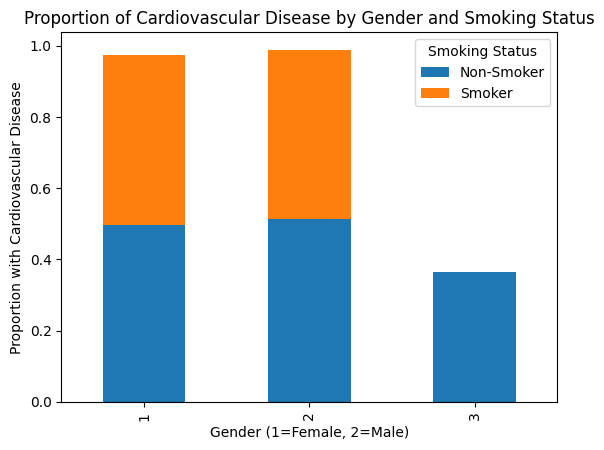

In [ ]:
# Get the proportion of cardiovascular disease by gender and smoking status
gender_smoke = med_ex_df.groupby(['gender', 'smoke'])['cardio'].mean()

# Create a DataFrame for visualization
gender_smoke_df = gender_smoke.unstack()

# Plot a stacked bar chart
gender_smoke_df.plot(kind='bar', stacked=True)

# Add labels and title
plt.title('Proportion of Cardiovascular Disease by Gender and Smoking Status')
plt.xlabel('Gender (1=Female, 2=Male)')
plt.ylabel('Proportion with Cardiovascular Disease')
plt.legend(['Non-Smoker', 'Smoker'], title='Smoking Status')

# Show the plot
plt.show()


## 2) Monika: Demographic and Clinical: example:
Age + glucose

In [ ]:
#Monika: Demographic and Clinical Analysis

#extract the relevant data (id, age and glucose and cardiovascular) from the table med_ex_df_1

#put age_years, gluc and cardio in a seperate table: https://blog.finxter.com/5-best-ways-to-select-multiple-columns-from-a-pandas-dataframe-in-python/
analysis_2_df=med_ex_df_1[['age_group', 'gluc', 'cardio']]
print(analysis_2_df)

      age_group  gluc  cardio
0         50-59     1       0
1         50-59     1       1
2         50-59     1       1
3         40-49     1       1
4         40-49     1       0
...         ...   ...     ...
69995     50-59     1       0
69996     60-69     2       1
69997     50-59     1       1
69998     60-69     2       1
69999     50-59     1       0

[64715 rows x 3 columns]


In [ ]:
#i dont know if clearing the data up so much makes sense, but after grouping the age there are many duplicates???mor is this nojt what duplicates mean
#find duplicates from these three columns
duplicates_2 = analysis_2_df[analysis_2_df.duplicated()]
duplicates_2

analysis_2_cleared_df = analysis_2_df.drop_duplicates()
analysis_2_cleared_df.info()
#analysis_2_df.duplicated()
#duplicates_2 = analysis_2_df[analysis_2_df.duplicated()]
#duplicates_2
#analysis_2_df.info()
#no duplicates found here
#checking for missing data actually not necessary here
#null_records = analysis_2_df.isnull().any(axis=1)
#analysis_2_df[null_records]


<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 0 to 6219
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age_group  25 non-null     category
 1   gluc       25 non-null     int64   
 2   cardio     25 non-null     int64   
dtypes: category(1), int64(2)
memory usage: 981.0 bytes


In [ ]:
print(analysis_2_cleared_df)

     age_group  gluc  cardio
0        50-59     1       0
1        50-59     1       1
3        40-49     1       1
4        40-49     1       0
5        60-69     2       0
6        60-69     1       0
7        60-69     3       1
14       30-39     1       0
17       40-49     3       0
22       60-69     2       1
29       50-59     3       0
31       60-69     1       1
53       30-39     3       1
56       40-49     2       0
68       50-59     2       1
87       50-59     3       1
106      30-39     1       1
107      30-39     2       1
108      40-49     2       1
150      40-49     3       1
152      50-59     2       0
339      60-69     3       0
1029     30-39     2       0
1394     30-39     3       0
6219       <30     1       0


In [ ]:
#analyze the correlation of the cardiovascular health with age and glucose


<ipython-input-102-2dd195e489f5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis_2_df['age_group'] = pd.cut(analysis_2_df['age'], bins=[0, 30, 40, 50, 60, 70, 80, 100], labels=['<30', '30-39', '40-49', '50-59', '60-69', '70-79', '80+'])


,age,gluc,cardio,age_group
0,50.391781,1,0,50-59
1,55.419178,1,1,50-59
2,51.663014,1,1,50-59
3,48.282192,1,1,40-49
4,47.873973,1,0,40-49
5,60.038356,2,0,60-69
6,60.583562,1,0,60-69
7,61.873973,3,1,60-69
8,48.405479,1,0,40-49
9,54.339726,1,0,50-59


<ipython-input-145-9a06c90e610b>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = analysis_2_df.groupby(['age_group', 'gluc'])


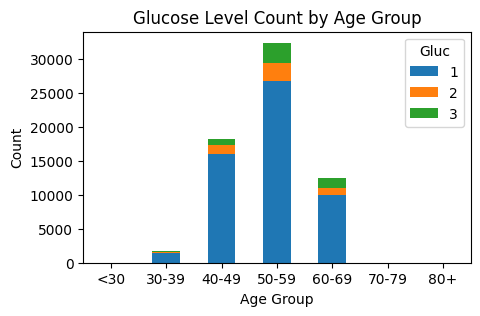

In [ ]:
# Group the data by age_group and glucose
grouped_data = analysis_2_df.groupby(['age_group', 'gluc'])

# Calculate the count for each group
age_group_gluc_counts = grouped_data.size()

# Reshape the result to have gender as rows and alignment as columns
age_group_gluc_counts = age_group_gluc_counts.unstack()

age_group_gluc_counts = age_group_gluc_counts.fillna(0)

# Display the resulting DataFrame
(age_group_gluc_counts)

# Create a stacked bar chart
age_group_gluc_counts.plot(kind='bar', stacked=True, figsize=(5, 3))
plt.title('Glucose Level Count by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Gluc')

# Display the plot
plt.show()


In [ ]:
#Calculate overall cardiovascular disease risk for each age group
glucose_risk = analysis_2_cleared_df.groupby('gluc')['cardio'].mean()
print("Overall cardiovascular disease risk by glucose level:")
print(glucose_risk)

# Calculate overall cardiovascular disease risk for each age group
age_risk = analysis_2_df.groupby('age_group')['cardio'].mean()
print("Overall cardiovascular disease risk by age group:")
print(age_risk)

Overall cardiovascular disease risk by glucose level:
gluc
1    0.444444
2    0.500000
3    0.500000
Name: cardio, dtype: float64
Overall cardiovascular disease risk by age group:
age_group
<30      0.000000
30-39    0.259482
40-49    0.399660
50-59    0.538967
60-69    0.674883
70-79         NaN
80+           NaN
Name: cardio, dtype: float64


<ipython-input-147-d142df7c6aea>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_risk = analysis_2_df.groupby('age_group')['cardio'].mean()


In [ ]:
#Close the connection
#The connection must be closed at the end of the session

conn.close()

##6. Test solution with a variety of data

## Reflection
How did the use of Gen AI affect (positive and negative) your work on this assignemnt?